## Preprocessing

In [1]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt
import tqdm
from timeit import default_timer as timer
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from lightgbm import LGBMClassifier

from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
os.chdir('c:/users/fre_f/pythonprojects/bacteriological/')

In [3]:
df = pd.read_csv('./data/final/05_species_desl_ra.csv')

In [4]:
df.head()

,Index,DESL,None;Other;Other;Other;Other;Other;Other,k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter;s__smithii,k__Bacteria;p__Acidobacteria;c__Acidobacteria;o__NA;f__NA;g__Blastocatella;s__sp3006,k__Bacteria;p__Acidobacteria;c__Holophagae;o__NA;f__NA;g__NA;s__sp3737,k__Bacteria;p__Acidobacteria;c__Holophagae;o__NA;f__NA;g__NA;s__sp4001,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Acidimicrobiaceae;g__NA;s__sp4262,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Iamiaceae;g__Iamia;s__sp4310,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Iamiaceae;g__Iamia;s__sp4312,...,Light treatment,OSDI score,DEQ5 score,TBUT OD,TBUT OS,OSS OD,OSS OS,ST OD,ST OS,Demodicosis
0,P1,3,0.000000,0.000000,0.0,0.0,0,0,0.0,0,...,0,NaN,NaN,3,3,0,0,23,23,0
1,P2,3,0.000000,0.000000,0.0,0.0,0,0,0.0,0,...,0,31.25,17.0,2,4,1,3,14,18,0
2,P3,2,0.000233,0.007146,0.0,0.0,0,0,0.0,0,...,1,33.30,16.0,8,8,3,3,11,8,0
3,P4,3,0.000000,0.000000,0.0,0.0,0,0,0.0,0,...,0,93.75,21.0,3,2,2,2,12,11,0
4,P5,1,0.000164,0.000000,0.0,0.0,0,0,0.0,0,...,1,6.25,7.0,11,11,0,0,22,32,0


In [5]:
df.iloc[:,2:]

,None;Other;Other;Other;Other;Other;Other,k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter;s__smithii,k__Bacteria;p__Acidobacteria;c__Acidobacteria;o__NA;f__NA;g__Blastocatella;s__sp3006,k__Bacteria;p__Acidobacteria;c__Holophagae;o__NA;f__NA;g__NA;s__sp3737,k__Bacteria;p__Acidobacteria;c__Holophagae;o__NA;f__NA;g__NA;s__sp4001,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Acidimicrobiaceae;g__NA;s__sp4262,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Iamiaceae;g__Iamia;s__sp4310,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Iamiaceae;g__Iamia;s__sp4312,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Iamiaceae;g__Iamia;s__sp4316,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__NA;g__NA;s__sp4642,...,Light treatment,OSDI score,DEQ5 score,TBUT OD,TBUT OS,OSS OD,OSS OS,ST OD,ST OS,Demodicosis
0,0.000000,0.000000,0.0,0.0,0,0,0.0,0,0,0.0,...,0,NaN,NaN,3,3,0,0,23,23,0
1,0.000000,0.000000,0.0,0.0,0,0,0.0,0,0,0.0,...,0,31.25,17.0,2,4,1,3,14,18,0
2,0.000233,0.007146,0.0,0.0,0,0,0.0,0,0,0.0,...,1,33.30,16.0,8,8,3,3,11,8,0
3,0.000000,0.000000,0.0,0.0,0,0,0.0,0,0,0.0,...,0,93.75,21.0,3,2,2,2,12,11,0
4,0.000164,0.000000,0.0,0.0,0,0,0.0,0,0,0.0,...,1,6.25,7.0,11,11,0,0,22,32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.000159,0.000000,0.0,0.0,0,0,0.0,0,0,0.0,...,0,40.90,10.0,2,1,1,1,12,17,0
57,0.000000,0.000000,0.0,0.0,0,0,0.0,0,0,0.0,...,0,18.75,8.0,6,6,0,0,35,35,1
58,0.000000,0.006446,0.0,0.0,0,0,0.0,0,0,0.0,...,0,75.00,16.0,6,5,2,1,17,14,0
59,0.000000,0.000000,0.0,0.0,0,0,0.0,0,0,0.0,...,0,20.45,9.0,7,4,0,1,35,27,1


In [6]:
df.iloc[:,1]

0     3
1     3
2     2
3     3
4     1
     ..
56    3
57    2
58    2
59    2
60    3
Name: DESL, Length: 61, dtype: int64

In [7]:
X = df.iloc[:,2:]
y = df.iloc[:,1]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(48, 1355)
(13, 1355)
(48,)
(13,)


In [10]:
def xgbmetrics():
    y_pred = clfxgb.predict(X_test)
    y_pred = le.inverse_transform(y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")
    cf = confusion_matrix(y_test, y_pred)
    target_names = ['1', '2', '3']
    print(f"Balanced accuracy: {bal_acc}")
    print(f"MCC: {mcc}")
    print(f"F1: {f1}")
    print(f"Confusion matrix: \n{cf}")
    print(f"Classification report: \n{classification_report(y_test, y_pred, target_names=target_names)}")

In [11]:
def lgbmetrics():
    y_pred = clflgbm.predict(X_test)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")
    cf = confusion_matrix(y_test, y_pred)
    target_names = ['1', '2', '3']
    print(f"Balanced accuracy: {bal_acc}")
    print(f"MCC: {mcc}")
    print(f"F1: {f1}")
    print(f"Confusion matrix: \n{cf}")
    print(f"Classification report: \n{classification_report(y_test, y_pred, target_names=target_names)}")

## Train, predict and explain

### XGBoost

In [12]:
le = LabelEncoder()
y_trainxgb = le.fit_transform(y_train)

clfxgb = XGBClassifier().fit(X_train, y_trainxgb)
clfxgb.predict(X_test)

xgbmetrics()

Balanced accuracy: 1.0
MCC: 1.0
F1: 1.0
Confusion matrix: 
[[2 0 0]
 [0 5 0]
 [0 0 6]]
Classification report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         6

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



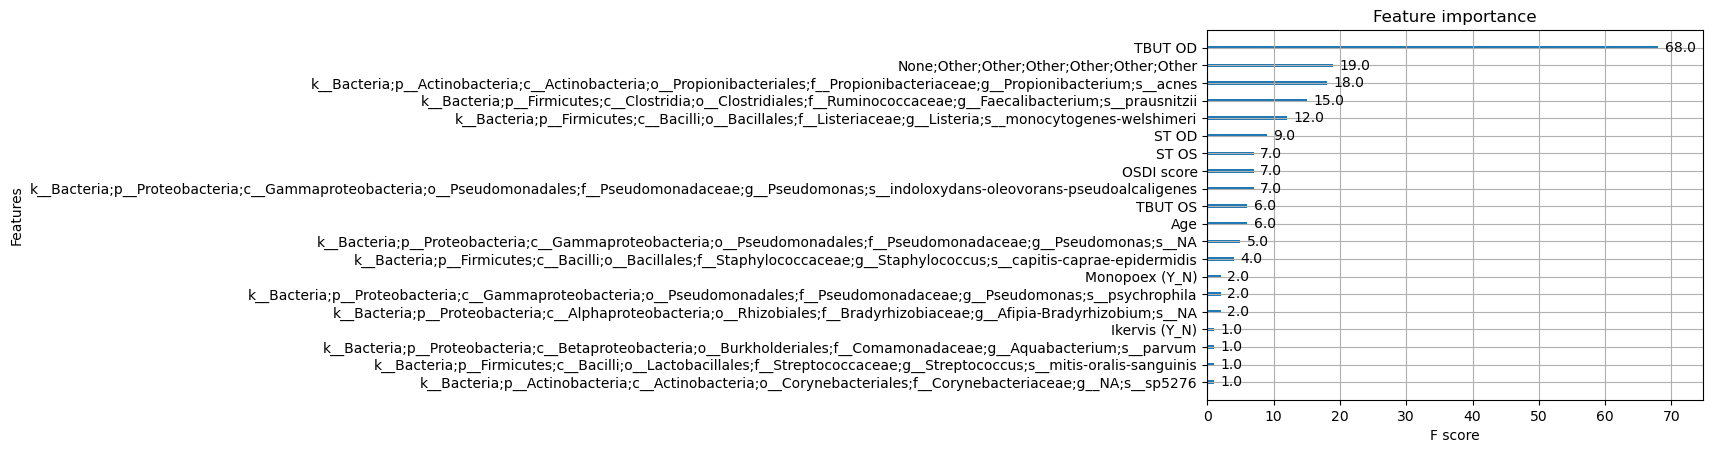

In [13]:
from xgboost import plot_importance
fig, ax = plt.subplots()
plot_importance(clfxgb, max_num_features = 20, ax=ax)
plt.title('Feature importance')

plt.show()

[10:15:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


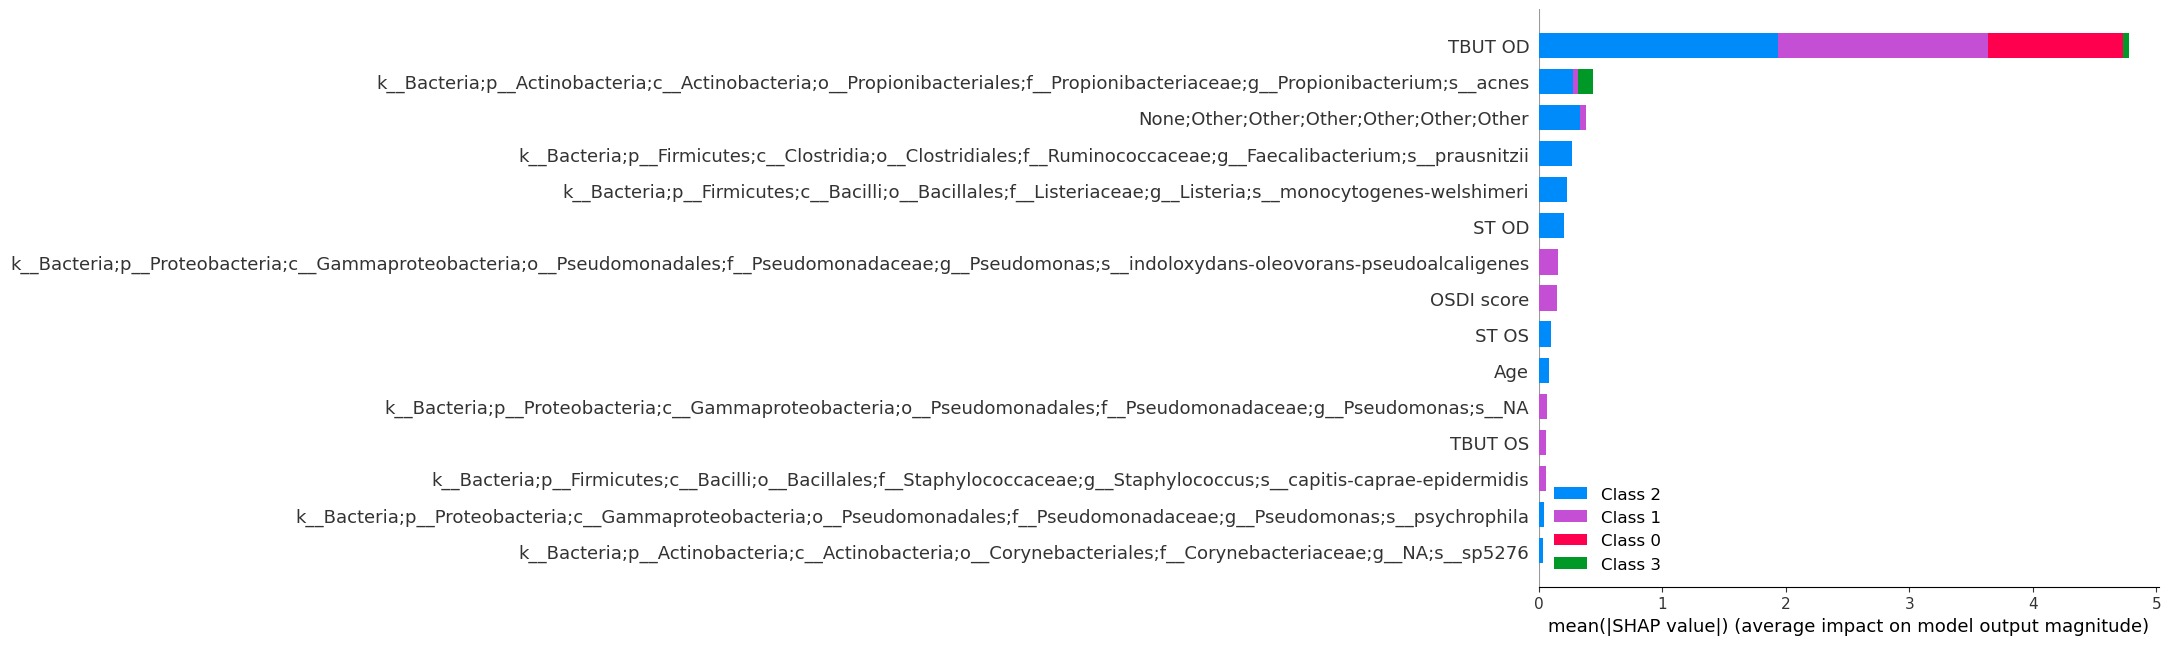

In [14]:
# Create a SHAP explainer for the XGBoost model
explainerxgb = shap.Explainer(clfxgb, X_test)

shap_valuesxgb = explainerxgb.shap_values(X_test.iloc[:,:])

shap.summary_plot(shap_valuesxgb, X_test, plot_type='bar', max_display=15)

In [15]:
# Make a customized SHAP plot with global values for each feaature

my_featuresxgb = clfxgb.get_booster().feature_names

shap_listxgb0 = []
shap_listxgb1 = []
shap_listxgb2 = []
shap_listxgb3 = []

for i in range(42):
    shap_listxgb0.append(abs(shap_valuesxgb[0][:,i,]).mean())
    shap_listxgb1.append(abs(shap_valuesxgb[1][:,i,]).mean())
    shap_listxgb2.append(abs(shap_valuesxgb[2][:,i,]).mean())
    shap_listxgb3.append(abs(shap_valuesxgb[3][:,i,]).mean())
    
shap_dictxgb = {}
# Add up shap values from all four classes (DESL 1-4)
for i in range(len(shap_listxgb0)):
    shap_dictxgb[my_featuresxgb[i]] = shap_listxgb0[i]
    shap_dictxgb[my_featuresxgb[i]] += shap_listxgb1[i]
    shap_dictxgb[my_featuresxgb[i]] += shap_listxgb2[i]
    shap_dictxgb[my_featuresxgb[i]] += shap_listxgb3[i]
    
# Sort in decreasing order
shap_dictxgb = {k:v for k, v in sorted(shap_dictxgb.items(), key=lambda item: item[1], reverse=True)}

most_important_featuresxgb = []
most_important_valuesxgb = []

for k, v in shap_dictxgb.items():
    most_important_featuresxgb.append(k)
    most_important_valuesxgb.append(v)
    
# Choose top X features
most_important_featuresxgb = most_important_featuresxgb[:20]
most_important_valuesxgb = most_important_valuesxgb[:20]

most_important_featuresxgb.reverse()
most_important_valuesxgb.reverse()

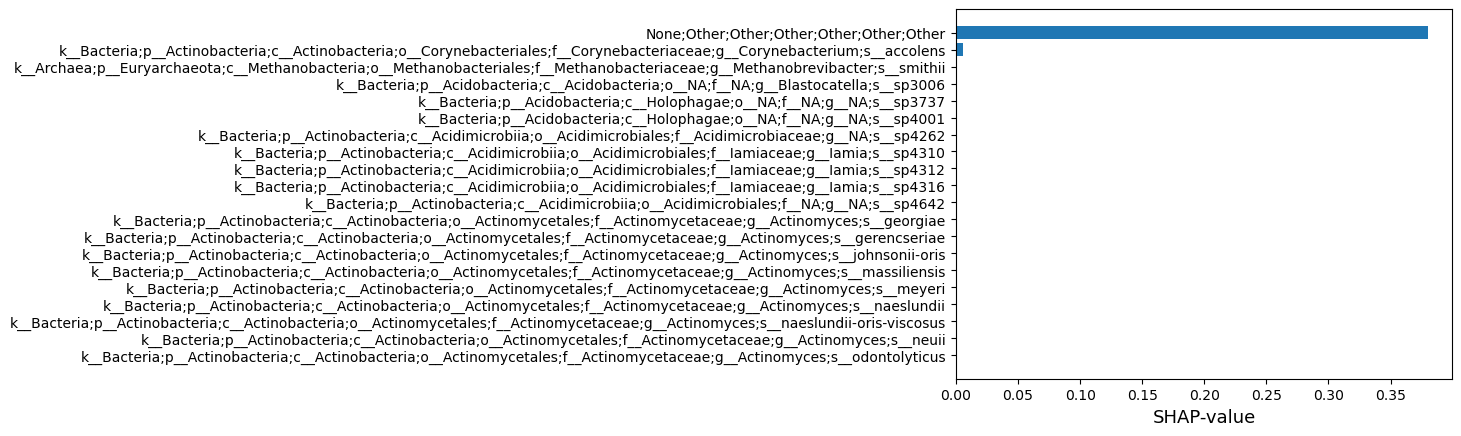

In [16]:
plt.barh(most_important_featuresxgb, most_important_valuesxgb)
ax = plt.gca()
plt.xlabel('SHAP-value', size=13)
plt.show()

### LightGBM

In [17]:
clflgbm = LGBMClassifier().fit(X_train, y_train)
clflgbm.predict(X_test)

lgbmetrics()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 376
[LightGBM] [Info] Number of data points in the train set: 48, number of used features: 38
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -1.306252
[LightGBM] [Info] Start training from score -0.652325
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

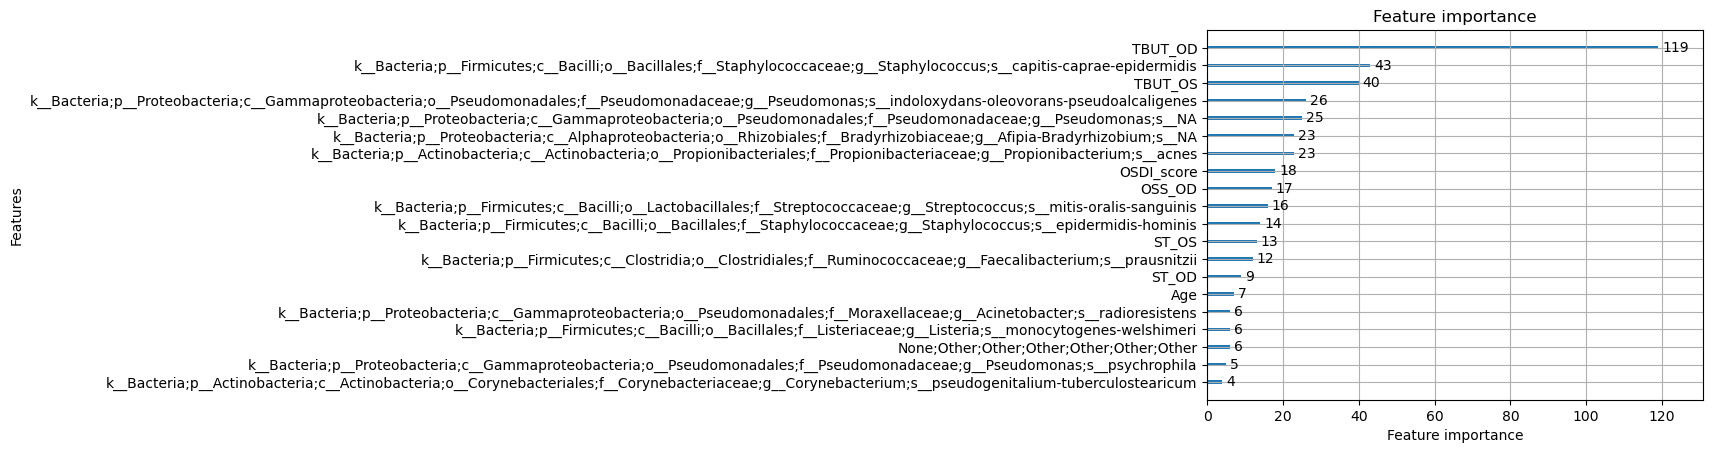

In [18]:
lgb.plot_importance(clflgbm, max_num_features=20, ignore_zero=False)

In [19]:
# Create a SHAP explainer for the LightGBM model

explainerlgbm = shap.Explainer(clflgbm, X_test)

In [20]:
# Compute SHAP values for the dataset

#shap_valueslgbm = explainerlgbm(X)
shap_valueslgbm = explainerlgbm.shap_values(X_test.iloc[:,:])

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


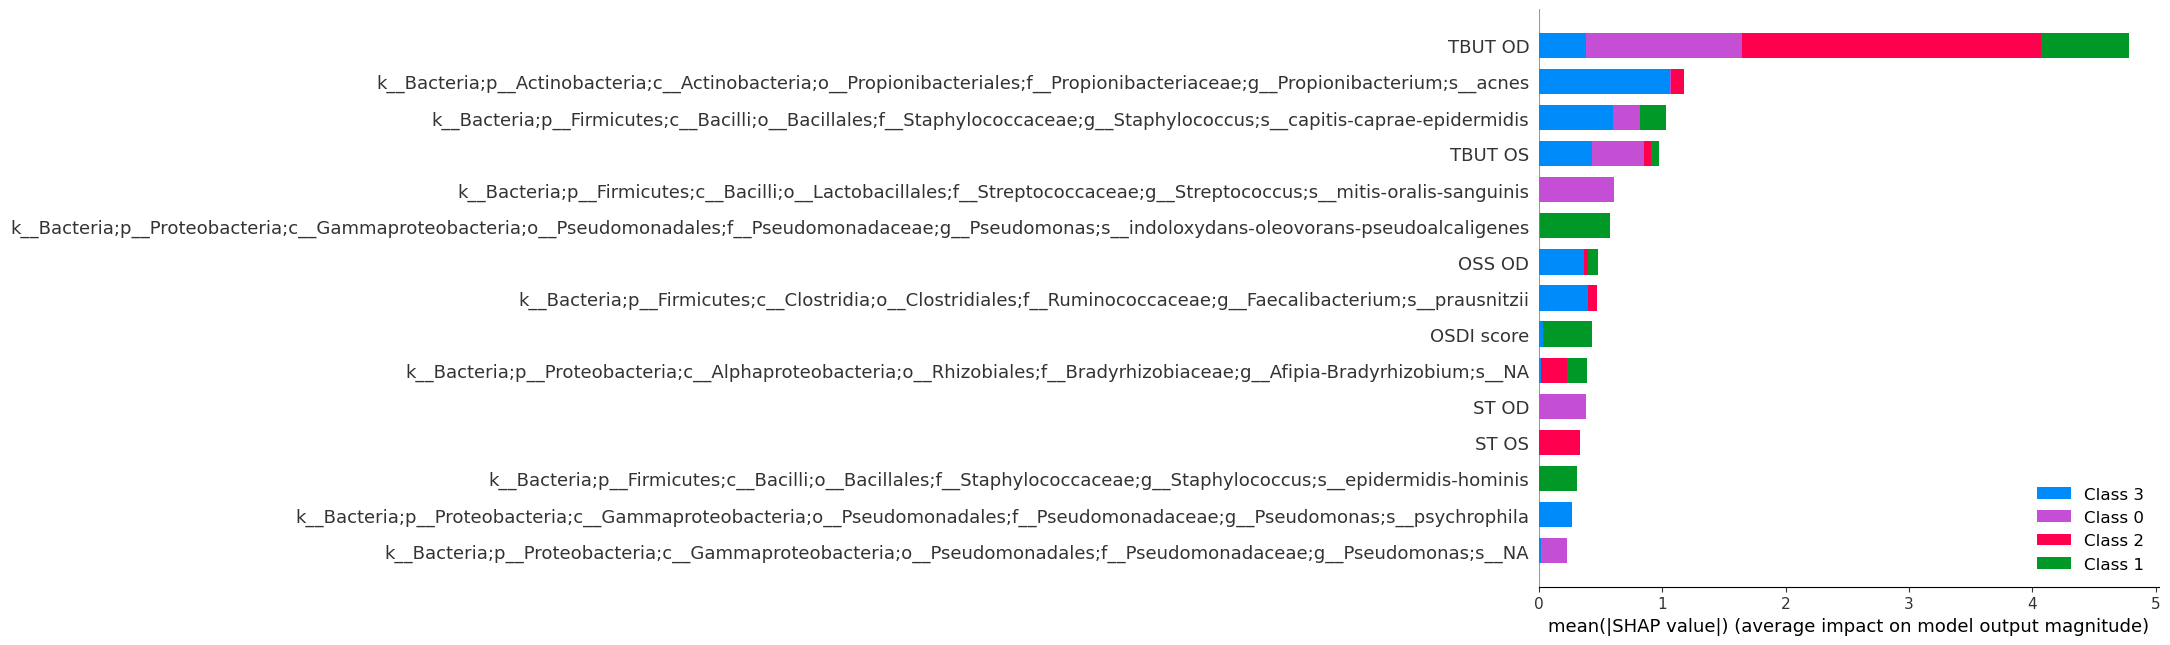

In [21]:
shap.summary_plot(shap_valueslgbm, X_test, plot_type='bar', max_display=15)

In [22]:
# Make a customized SHAP plot with global values for each feaature

my_features = clflgbm.feature_name_

shap_list0 = []
shap_list1 = []
shap_list2 = []
shap_list3 = []

for i in range(42):
    shap_list0.append(abs(shap_valueslgbm[0][:,i,]).mean())
    shap_list1.append(abs(shap_valueslgbm[1][:,i,]).mean())
    shap_list2.append(abs(shap_valueslgbm[2][:,i,]).mean())
    shap_list3.append(abs(shap_valueslgbm[3][:,i,]).mean())
    
shap_dict = {}
# Add up shap values from all four classes (DESL 1-4)
for i in range(len(shap_list0)):
    shap_dict[my_features[i]] = shap_list0[i]
    shap_dict[my_features[i]] += shap_list1[i]
    shap_dict[my_features[i]] += shap_list2[i]
    shap_dict[my_features[i]] += shap_list3[i]
    
# Sort in decreasing order
shap_dict = {k:v for k, v in sorted(shap_dict.items(), key=lambda item: item[1], reverse=True)}

most_important_features = []
most_important_values = []

for k, v in shap_dict.items():
    most_important_features.append(k)
    most_important_values.append(v)
    
# Choose top X features
most_important_features = most_important_features[:20]
most_important_values = most_important_values[:20]

most_important_features.reverse()
most_important_values.reverse()

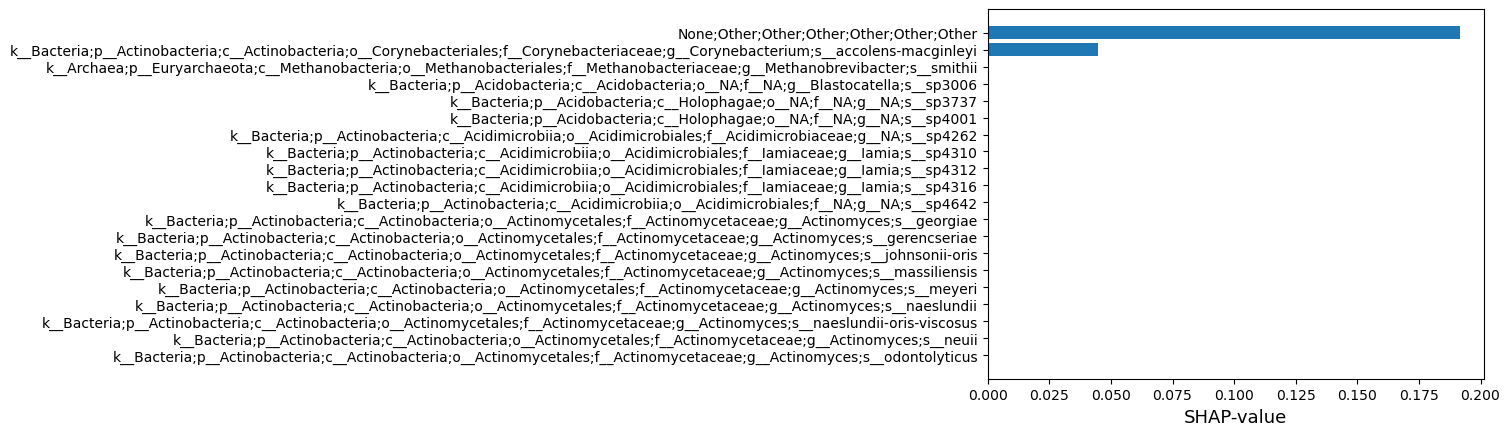

In [23]:
plt.barh(most_important_features, most_important_values)
ax = plt.gca()
plt.xlabel('SHAP-value', size=13)
plt.show()